In [ ]:
import featurization as f
import pandas as pd
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx

Invalid argument (must be a Polygon)


In [ ]:
df = f.import_and_clean_data("all-sc-bike-data-1101.csv")
df = f.group_and_create_target(df)

In [ ]:
df['geolocation'] = df.apply(lambda z: Point(z.lon, z.lat), axis=1)

In [ ]:
geodf.head()

In [1]:
geodf = geopandas.GeoDataFrame(df, geometry='geolocation')

NameError: name 'geopandas' is not defined

In [ ]:
w, s, e, n = geodf.total_bounds

In [53]:
w, s, e, n

(-122.08378, 36.93204, -121.76485, 37.01716)

In [54]:
geodf.crs = {'init': 'epsg:4326'}

In [55]:
geodf.crs

{'init': 'epsg:4326'}

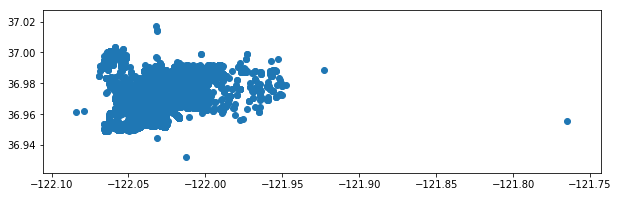

In [56]:
geodf.plot(figsize = (10,10))

In [57]:
ctx.howmany(w, s, e, n, 12, ll=True)

Using zoom level 12, this will download 10 tiles


10

In [58]:
img, ext = ctx.bounds2img(w, s, e, n, 12, ll=True)

In [73]:
geodf_bytime = geodf.copy()
geodf_bytime.sort_values('idle_time', inplace=True)

In [ ]:
f, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(img, extent=ext)
geodf_bytime.to_crs(epsg=3857).plot(ax=ax, column='idle_time', cmap='coolwarm')
ax.axis('off')

In [ ]:
#without adjusting for bikes that barely move

In [79]:
#drop the four bikes that sat for 3 days or more, just to improve the color ramp
geodf_bytime.drop([6460, 1662, 4011, 3168], axis=0, inplace=True)

(-13599676.072498558, -13550756.374396045, 4422340.708467156, 4441908.58770816)

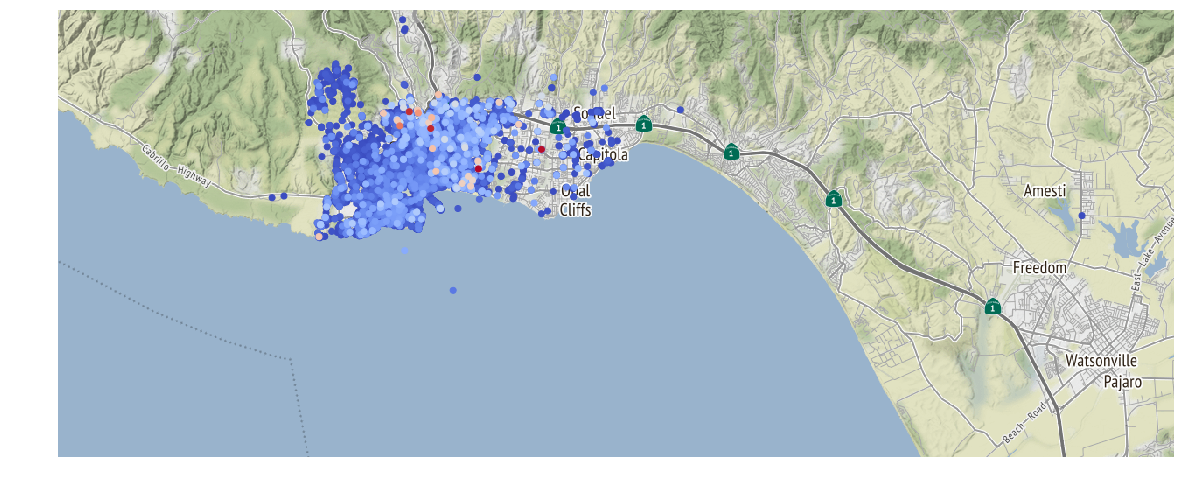

In [80]:
f, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(img, extent=ext)
geodf_bytime.to_crs(epsg=3857).plot(ax=ax, column='idle_time', cmap='coolwarm')
ax.axis('off')

In [70]:
geodf.describe()

,lat,lon,idle_time,batt_start,batt_end
count,11394.000000,11394.000000,11394,11394.000000,11394.000000
mean,36.972266,-122.027079,0 days 02:24:20.132087,60.147358,59.978936
std,0.010275,0.016917,0 days 05:26:49.457580,21.490158,21.470093
min,36.932040,-122.083780,0 days 00:00:00,2.000000,2.000000
25%,36.965153,-122.036120,0 days 00:04:15.250000,42.000000,42.000000
50%,36.971750,-122.026420,0 days 00:32:20,60.000000,60.000000
75%,36.979318,-122.019560,0 days 02:01:36.750000,78.000000,78.000000
max,37.017160,-121.764850,7 days 14:14:31,100.000000,100.000000
